In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import cm
from scipy.special import comb

In [2]:
G = nx.drawing.nx_agraph.read_dot('../results/dc2-graph.dot')

In [3]:
degrees = list(map(lambda d: d[1], G.degree))
vmin = min(degrees)
vmax = max(degrees)

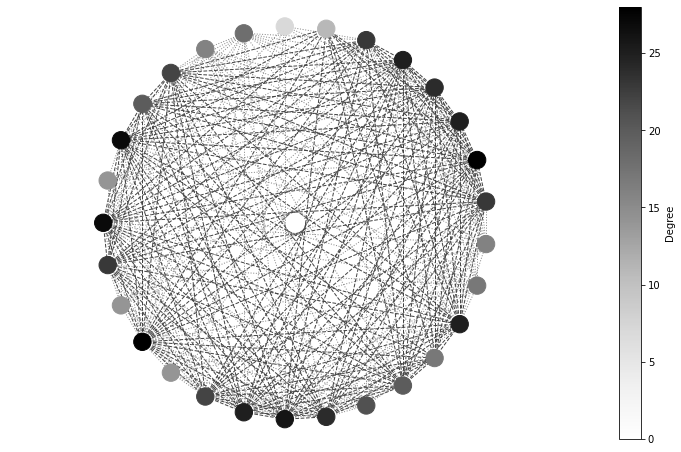

In [4]:
sm = cm.ScalarMappable(cmap='Greys', norm=plt.Normalize(vmin=0, vmax=vmax))

def same(node):
    a, b = node.split('⊆')
    return a.split('::')[1].strip() == b.split('::')[1].strip()

def color_node(node):
    return sm.to_rgba(G.degree(node))

def edge_color(e):
    if same(e[0]) and same(e[1]):
        return '#444444'
    return '#888888'

def edge_style(e):
    if same(e[0]) and same(e[1]):
        return '--'
    return ':'

plt.figure(figsize=(10, 6))
g = nx.draw(
    G, pos=nx.shell_layout(G), with_labels=False,
    node_color=list(map(color_node, G)),
    edge_color=list(map(edge_color, G.edges)), style=list(map(edge_style, G.edges))
)
plt.colorbar(sm, label='Degree')
plt.xlim(-1.5,1.5)
plt.savefig('/home/aalvarez/Downloads/bad_clique.eps')
plt.show()

In [5]:
max_2ind = int(comb(len(G), 2))
print(len(G), "Unary IND")
print(len(G.edges), "Binary IND")
print(max_2ind, "Possible binary IND")
print('Gamma: ', len(G.edges) / max_2ind)

29 Unary IND
301 Binary IND
406 Possible binary IND
Gamma:  0.7413793103448276


In [6]:
comb(len(G), 3)

3654.0

In [7]:
print(sum(map(same, G)))

20
